In [107]:
import numpy as np
from numpy import mean
import pandas as pd
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics as sm
from matplotlib import pyplot as plot

In [125]:
from tabpy.tabpy_tools.client import Client
client = Client('http://localhost:9004/')
# Connect to TabPy server using the client library
connection = Client('http://localhost:9004/')

In [126]:
data_frame = pd.read_csv('data/archiveOG.csv')
data_frame = data_frame.dropna()
data_frame

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
6,1958,7,1958.5370,315.86,315.17,315.87,315.21
7,1958,8,1958.6219,314.93,316.17,314.01,315.29
...,...,...,...,...,...,...,...
704,2016,9,2016.7077,401.01,404.52,401.33,404.85
705,2016,10,2016.7896,401.50,405.12,401.48,405.09
706,2016,11,2016.8743,403.64,405.92,403.08,405.34
707,2016,12,2016.9563,404.55,405.49,404.66,405.58


In [172]:
def CreateAvgDF(DataFrame):
    years = list(range(1958,2018)) 
    avgCo2 = []
   
    for year in years:
        TempDf = DataFrame.loc[data_frame['Year'] == year] 
   
        value = TempDf['Carbon Dioxide Fit (ppm)'].mean()
        avgCo2.append(value)
    newDF = pd.DataFrame({'Years': years, 'AVG_CO2':avgCo2})
    return newDF

In [173]:
CO2AvgDF = CreateAvgDF(data_frame)
features = np.array(CO2AvgDF['Years'])
label = np.array(CO2AvgDF['AVG_CO2'])
(features_train, features_test, label_train, label_test)= model_selection.train_test_split(features, label, test_size=0.3)
features_train = features_train.reshape(-1,1)
label_train = label_train.reshape(-1,1)
features_test = features_test.reshape(-1,1)
label_test = label_test.reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(features_train, label_train)
a= (mean(features_train)*mean(label_train)-mean(features_train*label_train)) / (mean(features_train)**2 - mean(features_train**2))
b = mean(label_train) - a*mean(features_train)
print(a,b)

1.5483503353088215 -2724.2122639905388


In [174]:
def Predictppm(year):
    data = np.array([year])  
    calculation = model.predict([data])
    return calculation[0]

In [175]:
def Predictppm2(year):
    data = np.column_stack([year])
    print(data)
    calculation = model.predict(data).tolist()
    return calculation[0]

In [176]:
Predictppm2(2050)

[[2050]]


[449.9059233924877]

<function matplotlib.pyplot.show(*args, **kw)>

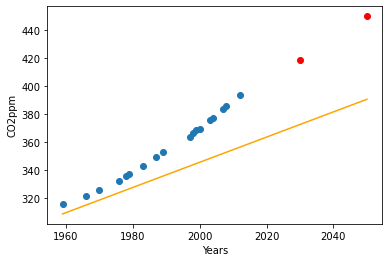

In [177]:
d = np.array([min(features_test), max(features_test)])
f = lambda k: 1.5454799112203481*k + (-2718.9336825949226) 

plot.scatter(features_test, label_test)

plot.ylabel('CO2ppm')
plot.xlabel('Years')
plot.scatter(2030,a*2030+b,color='red')
plot.scatter(2050,[a*2050+b],color='red')
plot.plot([min(features_test), 2050], f(d), c="orange")
plot.show


In [178]:
connection.deploy("CO2Prediction", Predictppm2,
                 "Returns predicted CO2ppm that year",
                 override=True)

In [179]:
client.query("CO2Prediction",2100)

{'response': [527.3234401578829],
 'version': 21,
 'model': 'CO2Prediction',
 'uuid': 'f0eeb34c-3b5b-4414-9edd-6db83b4415fd'}